In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥1.0.2 is required
import sklearn
assert sklearn.__version__ >= "1.0.2"

# Common imports
import numpy as np
import os
import pandas as pd
import time

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams.update({'font.size': 20})
mpl.rc('xtick', labelsize=18) 
mpl.rc('ytick', labelsize=18) 
mpl.rc('axes', labelsize=22)


# Load and process data

In [3]:
# read data from csv file
trainset = pd.read_csv('trainset.csv')
testset = pd.read_csv('testset.csv')
print(trainset.shape)
print(testset.shape)

(400000, 15)
(100000, 15)


In [4]:
trainset = trainset[:80000]
testset = testset[:20000]

In [5]:
trainset

,0_Ca,0_Cl,0_Na,0_K,0_N5,1_Ca,1_Cl,1_Na,1_K,1_N5,out_Ca,out_Cl,out_Na,out_K,out_N5
0,0.161174,0.171179,0.190165,0.120935,1.350212,1.056451,0.193114,1.444958,0.695734,0.479574,0.14470,0.1712,0.20220,0.1419,1.3500
1,0.423602,1.382765,0.820649,0.519395,1.452619,1.352251,0.114686,0.786331,0.678745,0.089417,0.43290,1.3830,0.81340,0.5080,1.4530
2,0.503761,0.189046,0.664879,1.167841,1.119928,0.956911,0.908253,0.363669,1.124104,1.145583,0.52100,0.1890,0.65780,1.1400,1.1200
3,0.880587,0.127701,1.431338,0.839942,0.316748,1.220548,0.762692,1.015726,0.331939,1.354177,0.90300,0.1277,1.42400,0.8029,0.3167
4,0.066546,0.423571,0.822247,0.245692,0.695961,1.380494,1.270255,0.397128,0.491424,0.795490,0.09194,0.4236,0.79210,0.2250,0.6960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,0.219763,0.968065,0.846488,0.654005,1.350314,0.654463,1.190766,0.920381,1.149171,1.041781,0.22250,0.9681,0.83830,0.6568,1.3500
79996,1.103027,0.221112,1.073038,0.893318,1.343754,0.768043,1.134665,1.021040,0.168069,0.931400,1.12300,0.2211,1.07500,0.8517,1.3440
79997,1.090236,0.834718,0.072005,1.180395,0.688034,1.061947,0.837776,0.213008,0.154447,1.221590,1.12000,0.8347,0.07391,1.1190,0.6880
79998,0.665068,1.152922,0.855278,1.146046,0.105938,0.494803,1.015711,0.565940,0.603938,0.210271,0.68260,1.1530,0.85240,1.1140,0.1059


In [6]:
trainset['out_Ca_dif'] = trainset['out_Ca']-trainset['0_Ca']
trainset['out_Na_dif'] = trainset['out_Na']-trainset['0_Na']
trainset['out_K_dif'] = trainset['out_K']-trainset['0_K']

In [7]:
testset['out_Ca_dif'] = testset['out_Ca']-testset['0_Ca']
testset['out_Na_dif'] = testset['out_Na']-testset['0_Na']
testset['out_K_dif'] = testset['out_K']-testset['0_K']

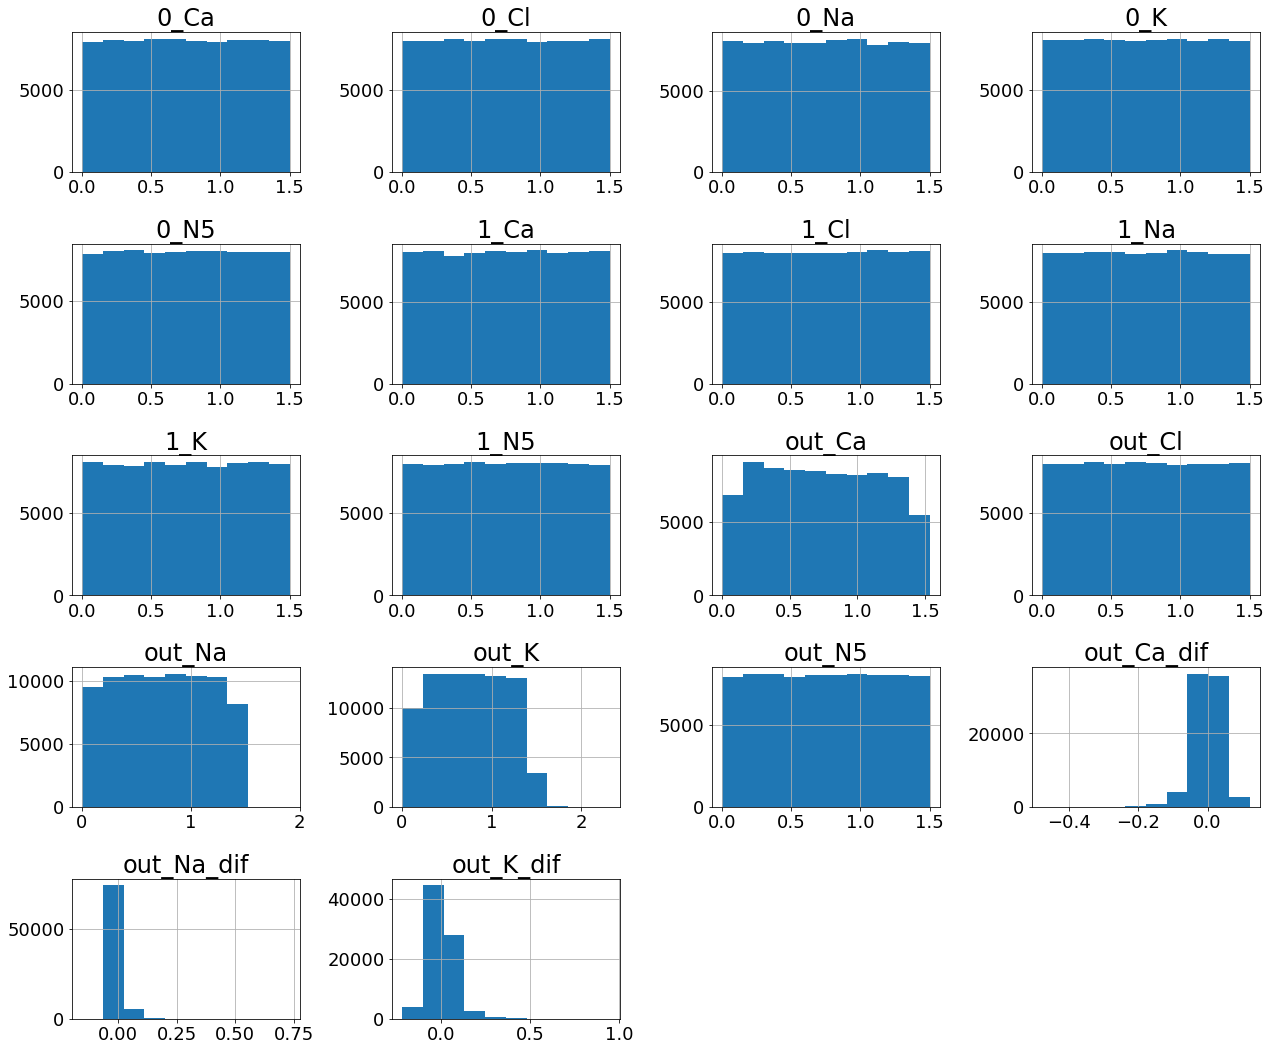

In [8]:
trainset.hist(figsize=(18, 15));
plt.tight_layout()

In [9]:
# split x and y
X_train = trainset.iloc[:, [0,2,3,5,7,8]].values 
y_train = trainset.iloc[:, [15, 16, 17]].values
X_test = testset.iloc[:, [0,2,3,5,7,8]].values 
y_test = testset.iloc[:, [15, 16, 17]].values

# Name variables
inputs = [list(trainset)[i] for i in [0,2,3,5,7,8]] 
outputs = [list(trainset)[i] for i in [15, 16, 17]] # do not work for list -> list(trainset)[10, 12, 13]

In [10]:
print('Inputs: ', inputs)
print('Outputs: ', outputs)
print('X_train instances: ', X_train.shape)
print('X_test instances: ', X_test.shape)
print('y_train instances: ', y_train.shape)
print('y_test instances: ', y_test.shape)

Inputs:  ['0_Ca', '0_Na', '0_K', '1_Ca', '1_Na', '1_K']
Outputs:  ['out_Ca_dif', 'out_Na_dif', 'out_K_dif']
X_train instances:  (80000, 6)
X_test instances:  (20000, 6)
y_train instances:  (80000, 3)
y_test instances:  (20000, 3)


## Normalize data

In [11]:
# Normalize data for checking
min_ = np.array([2.40311919e-05, 4.88878123e-07, 2.50729397e-06, 1.07587663e-06, 7.33135675e-06, 1.21962831e-05])
max_ = np.array([1.49997587, 1.49999182, 1.49999116, 1.49997541, 1.49999112, 1.49998768])
#min_ = X_train.min(axis=0)
#max_ = X_train.max(axis=0)
X_train_norm = ((X_train - min_)/(max_-min_))*2 -1 
X_test_norm = ((X_test - min_)/(max_-min_))*2 -1

print("min:\n", min_)
print("\nmax:\n", max_)

min:
 [2.40311919e-05 4.88878123e-07 2.50729397e-06 1.07587663e-06
 7.33135675e-06 1.21962831e-05]

max:
 [1.49997587 1.49999182 1.49999116 1.49997541 1.49999112 1.49998768]


In [12]:
min_

array([2.40311919e-05, 4.88878123e-07, 2.50729397e-06, 1.07587663e-06,
       7.33135675e-06, 1.21962831e-05])

In [13]:
max_

array([1.49997587, 1.49999182, 1.49999116, 1.49997541, 1.49999112,
       1.49998768])

## XGB

In [14]:
import xgboost as xgb

reg_best = xgb.XGBRegressor(objective='reg:squarederror', 
                             colsample_bytree= 1.0, 
                             learning_rate= 0.05, 
                             max_depth= 10, 
                             n_estimators= 500, 
                             reg_lambda= 10,
                             subsample= 0.2,
                             n_jobs=-1, 
                             random_state=42)
start = time.time()
reg_best.fit(X_train_norm, y_train)
print("Run time = ", time.time()-start)

Run time =  41.046314001083374


In [15]:
xgb_model = reg_best.get_booster() 
num_round = reg_best.get_num_boosting_rounds()
param = reg_best.get_xgb_params()
print(num_round)
print(param)

500
{'objective': 'reg:squarederror', 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1.0, 'eval_metric': None, 'gamma': 0, 'gpu_id': -1, 'grow_policy': 'depthwise', 'interaction_constraints': '', 'learning_rate': 0.05, 'max_bin': 256, 'max_cat_to_onehot': 4, 'max_delta_step': 0, 'max_depth': 10, 'max_leaves': 0, 'min_child_weight': 1, 'monotone_constraints': '()', 'n_jobs': -1, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 42, 'reg_alpha': 0, 'reg_lambda': 10, 'sampling_method': 'uniform', 'scale_pos_weight': 1, 'subsample': 0.2, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}


In [16]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [35]:
xgb_model.save_model("XGBmodel_concat_delta-100.bin")
#xgb_model_retrained.save_model("XGBmodel.bin")

In [36]:
start = time.time()

xgb_loaded = xgb.Booster({'nthread': 1})  # init model
xgb_loaded.load_model('XGBmodel_concat_delta-100.bin')  # load model

end = time.time()
print("time = ", end - start)
print()

time =  0.013704538345336914



In [19]:
dtrain_norm = xgb.DMatrix(X_train_norm, label=y_train)
dtest_norm = xgb.DMatrix(X_test_norm, label=y_test)

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('rmse: ', np.sqrt(mean_squared_error(y_test, xgb_loaded.predict(dtest_norm))))

rmse:  0.0026586787762894414


In [21]:
sorted(zip(reg_best.feature_importances_, inputs), reverse=True)

[(0.37912676, '1_Ca'),
 (0.2808018, '1_K'),
 (0.1995979, '0_K'),
 (0.11031822, '0_Ca'),
 (0.01726525, '1_Na'),
 (0.012890081, '0_Na')]

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

start = time.time()
y_train_pred = reg_best.predict(X_train_norm)
end = time.time()
print("time = ", start - end)
print()

mse = mean_squared_error(y_train, y_train_pred)
print('mse: ',mse)
rmse = np.sqrt(mse)
print('rmse: ',rmse)
mae = mean_absolute_error(y_train, y_train_pred)
print('mae: ',mae)

r2_model = r2_score(y_train, y_train_pred)
print('\nR2: ',r2_model)

time =  -0.1412196159362793

mse:  3.3186973982702837e-06
rmse:  0.0018217292329735183
mae:  0.0010009395912746882

R2:  0.9975737025464196


In [23]:
start = time.time()
y_test_pred = reg_best.predict(X_test_norm)
end = time.time()
print("time = ", start - end)
print()

mse = mean_squared_error(y_test, y_test_pred)
print('mse: ',mse)
rmse = np.sqrt(mse)
print('rmse: ',rmse)
mae = mean_absolute_error(y_test, y_test_pred)
print('mae: ',mae)

r2_model = r2_score(y_test, y_test_pred)
print('\nR2: ',r2_model)

time =  -0.05134916305541992

mse:  7.068572835491921e-06
rmse:  0.0026586787762894414
mae:  0.0011833036389122936

R2:  0.9956578560530179


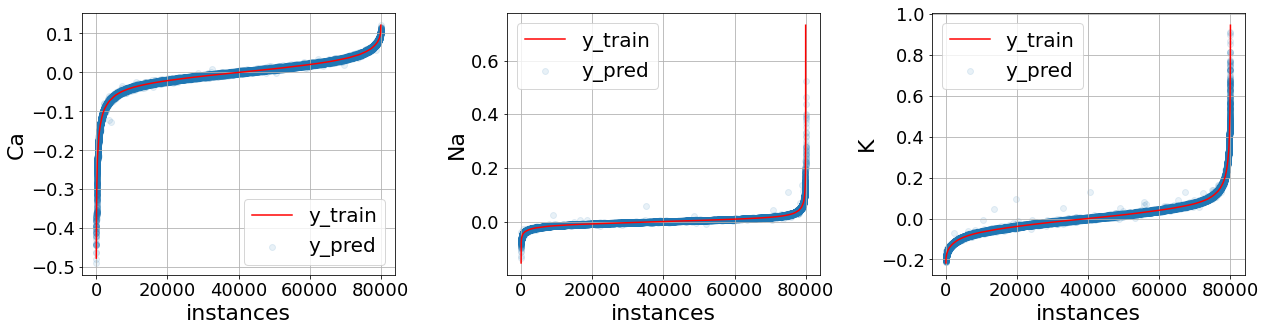

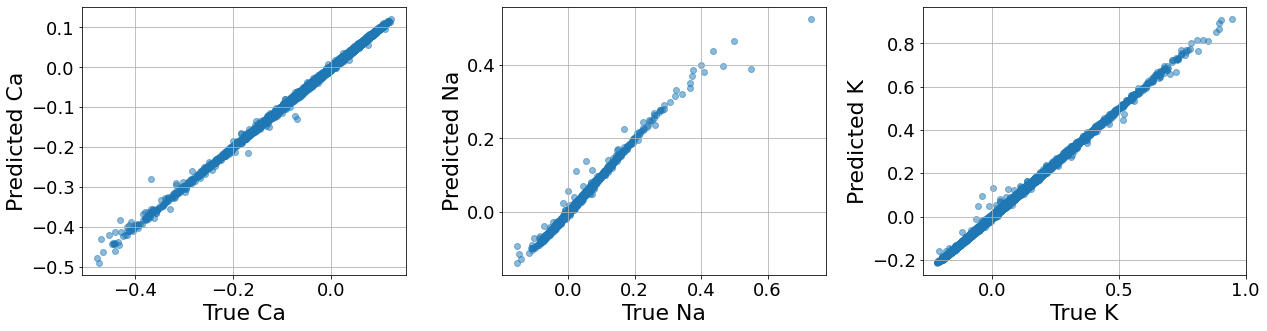

In [24]:
mpl.rcParams.update({'font.size': 20})
mpl.rc('xtick', labelsize=18) 
mpl.rc('ytick', labelsize=18) 
mpl.rc('axes', labelsize=22)
fig, axes = plt.subplots(1,3, figsize=[18,5])

for i, ax in enumerate(axes.flat):
    aux_train = y_train[:,i]
    aux_pred = y_train_pred[:,i]
    index = np.argsort(aux_train)
    x = range(len(index))
    ax.plot(x, aux_train[index], 'r-')
    ax.scatter(x, aux_pred[index], alpha=0.1)
    ax.legend(['y_train', 'y_pred'])
    ax.set_xlabel('instances')
    ax.set_ylabel(outputs[i].split('_')[1])
    ax.grid()
plt.tight_layout()

print('\n\n')

fig, axes = plt.subplots(1,3, figsize=[18,5])

for i, ax in enumerate(axes.flat):
    ax.scatter(y_train[:,i], y_train_pred[:,i], alpha=0.5)
    ax.set_xlabel('True '+outputs[i].split('_')[1])
    ax.set_ylabel('Predicted '+outputs[i].split('_')[1])
    ax.grid()
plt.tight_layout()

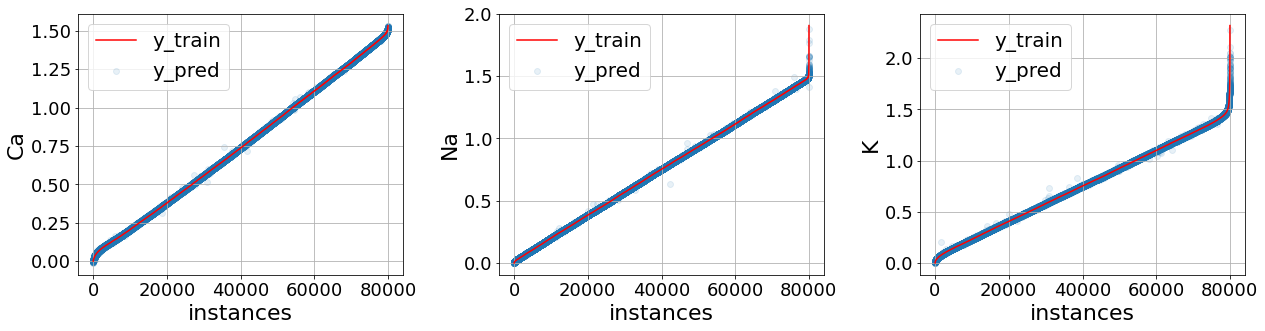

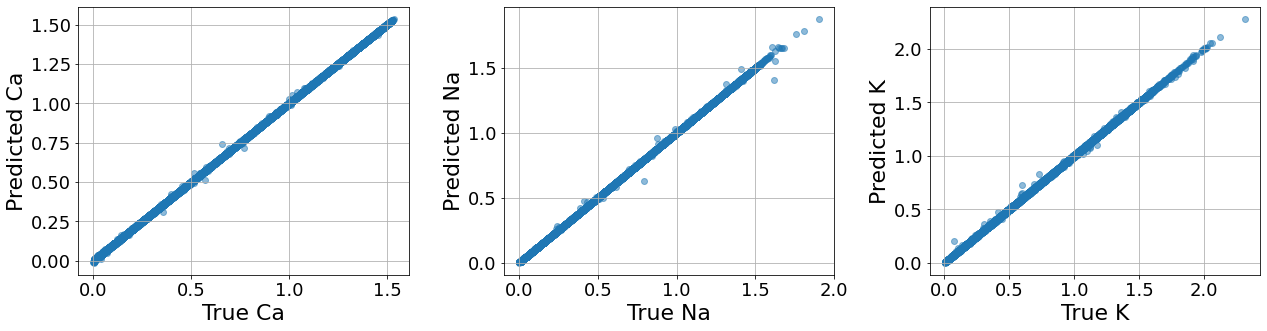

In [25]:
mpl.rcParams.update({'font.size': 20})
mpl.rc('xtick', labelsize=18) 
mpl.rc('ytick', labelsize=18) 
mpl.rc('axes', labelsize=22)
fig, axes = plt.subplots(1,3, figsize=[18,5])

for i, ax in enumerate(axes.flat):
    aux_train = y_train[:,i]+X_train[:,i]
    aux_pred = y_train_pred[:,i]+X_train[:,i]
    index = np.argsort(aux_train)
    x = range(len(index))
    ax.plot(x, aux_train[index], 'r-')
    ax.scatter(x, aux_pred[index], alpha=0.1)
    ax.legend(['y_train', 'y_pred'])
    ax.set_xlabel('instances')
    ax.set_ylabel(outputs[i].split('_')[1])
    ax.grid()
plt.tight_layout()

print('\n\n')

fig, axes = plt.subplots(1,3, figsize=[18,5])

for i, ax in enumerate(axes.flat):
    ax.scatter(y_train[:,i]+X_train[:,i], y_train_pred[:,i]+X_train[:,i], alpha=0.5)
    ax.set_xlabel('True '+outputs[i].split('_')[1])
    ax.set_ylabel('Predicted '+outputs[i].split('_')[1])
    ax.grid()
plt.tight_layout()

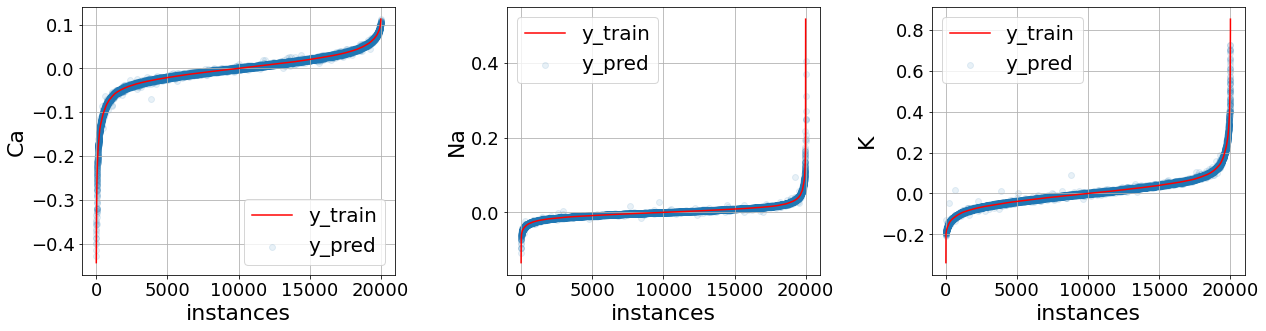

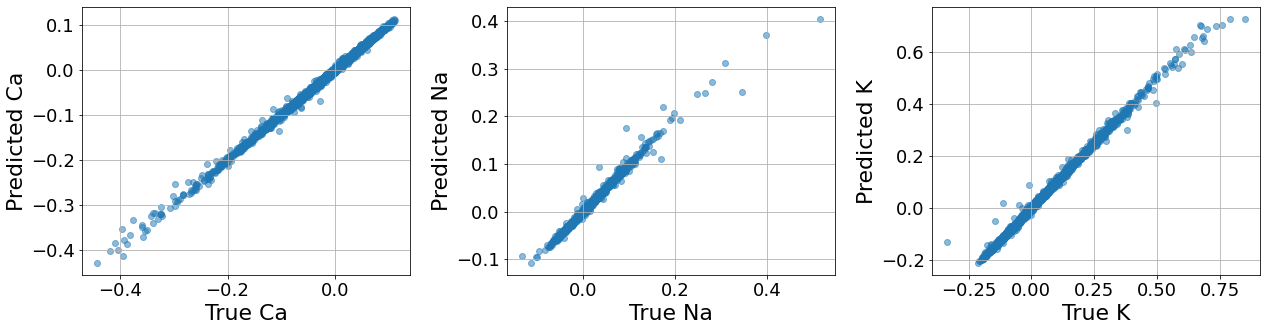

In [26]:
mpl.rcParams.update({'font.size': 20})
mpl.rc('xtick', labelsize=18) 
mpl.rc('ytick', labelsize=18) 
mpl.rc('axes', labelsize=22)
fig, axes = plt.subplots(1,3, figsize=[18,5])

for i, ax in enumerate(axes.flat):
    aux_train = y_test[:,i]
    aux_pred = y_test_pred[:,i]
    index = np.argsort(aux_train)
    x = range(len(index))
    ax.plot(x, aux_train[index], 'r-')
    ax.scatter(x, aux_pred[index], alpha=0.1)
    ax.legend(['y_train', 'y_pred'])
    ax.set_xlabel('instances')
    ax.set_ylabel(outputs[i].split('_')[1])
    ax.grid()
plt.tight_layout()

print('\n\n')

fig, axes = plt.subplots(1,3, figsize=[18,5])

for i, ax in enumerate(axes.flat):
    ax.scatter(y_test[:,i], y_test_pred[:,i], alpha=0.5)
    ax.set_xlabel('True '+outputs[i].split('_')[1])
    ax.set_ylabel('Predicted '+outputs[i].split('_')[1])
    ax.grid()
plt.tight_layout()

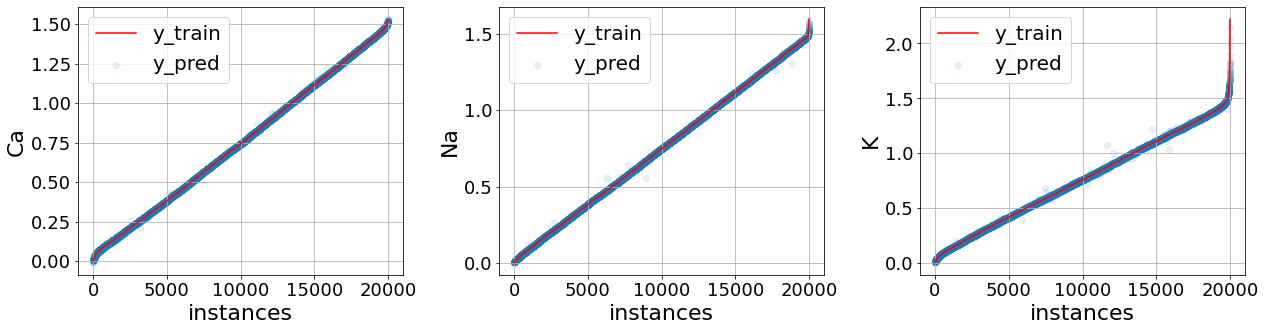

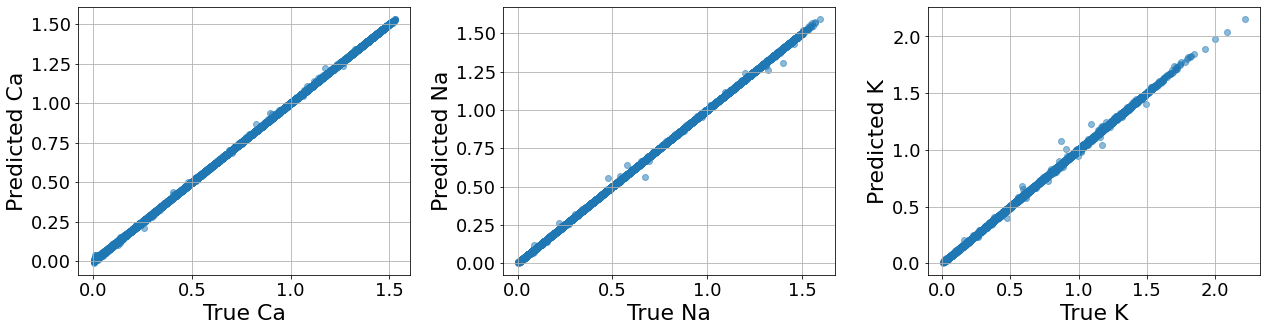

In [27]:
mpl.rcParams.update({'font.size': 20})
mpl.rc('xtick', labelsize=18) 
mpl.rc('ytick', labelsize=18) 
mpl.rc('axes', labelsize=22)
fig, axes = plt.subplots(1,3, figsize=[18,5])

for i, ax in enumerate(axes.flat):
    aux_train = y_test[:,i]+X_test[:,i]
    aux_pred = y_test_pred[:,i]+X_test[:,i]
    index = np.argsort(aux_train)
    x = range(len(index))
    ax.plot(x, aux_train[index], 'r-')
    ax.scatter(x, aux_pred[index], alpha=0.1)
    ax.legend(['y_train', 'y_pred'])
    ax.set_xlabel('instances')
    ax.set_ylabel(outputs[i].split('_')[1])
    ax.grid()
plt.tight_layout()

print('\n\n')

fig, axes = plt.subplots(1,3, figsize=[18,5])

for i, ax in enumerate(axes.flat):
    ax.scatter(y_test[:,i]+X_test[:,i], y_test_pred[:,i]+X_test[:,i], alpha=0.5)
    ax.set_xlabel('True '+outputs[i].split('_')[1])
    ax.set_ylabel('Predicted '+outputs[i].split('_')[1])
    ax.grid()
plt.tight_layout()

## Checking charge constraint

In [28]:
charge_in = 2*X_train[:, 0]+X_train[:, 1]+X_train[:, 2]
charge_out = 2*y_train_pred[:, 0]+y_train_pred[:, 1]+y_train_pred[:, 2]+2*X_train[:, 0]+X_train[:, 1]+X_train[:, 2]

mean_absolute_error(charge_in, charge_out)  

0.0023891562748555315

In [29]:
charge_in = 2*X_test[:, 0]+X_test[:, 1]+X_test[:, 2]
charge_out = 2*y_test_pred[:, 0]+y_test_pred[:, 1]+y_test_pred[:, 2]+2*X_test[:, 0]+X_test[:, 1]+X_test[:, 2]

mean_absolute_error(charge_in, charge_out)  

0.002770052895552362

## Run time

In [30]:
start = time.time()
for i in range(1000):  
    reg_best.predict(X_test_norm[0:1])
end = time.time()
print("time = ", (start - end)/1000)
print(reg_best.predict(X_test_norm[0:1]))

time =  -0.0013181054592132568
[[ 0.00073344 -0.00758553  0.00631639]]


In [31]:
dtest_1 = xgb.DMatrix(X_test_norm[0:1])

In [32]:
start = time.time()
for i in range(1000):  
    xgb_model.predict(dtest_1)
end = time.time()
print("time = ", (start - end)/1000)
print(xgb_model.predict(dtest_1))

time =  -0.00013964986801147462
[[ 0.00073344 -0.00758553  0.00631639]]


In [33]:
start = time.time()
for i in range(1000):  
    xgb_loaded.predict(dtest_1)
end = time.time()
print("time = ", (start - end)/1000)
print(xgb_loaded.predict(dtest_1))

time =  -6.592440605163574e-05
[[ 0.00073344 -0.00758553  0.00631639]]


In [34]:
import xgboost as xgb
xgb.__version__

'1.6.0-dev'

## Input test

In [38]:
X_test[0:1][0]

array([1.22731647, 1.2629426 , 0.27532708, 0.24953221, 0.31371877,
       0.15650663])

In [39]:
input_xgb = X_test[0:1][0]
input_norm = (input_xgb - min_)*2/(max_-min_) -1
print(input_norm)
print(X_test_norm[0:1])

[ 0.63644246  0.68393254 -0.63289779 -0.66728612 -0.58171356 -0.79133734]
[[ 0.63644246  0.68393254 -0.63289779 -0.66728612 -0.58171356 -0.79133734]]


In [40]:
dtinput = xgb.DMatrix([input_norm])
print(xgb_loaded.predict(dtinput))
print(xgb_loaded.predict(dtinput)+X_test[0:1,:3])

[[ 0.00073344 -0.00758553  0.00631639]]
[[1.22804991 1.25535707 0.28164347]]


In [41]:
print(y_test[0:1])
print(y_test[0:1]+X_test[0:1,:3])

[[ 0.00168353 -0.0069426   0.00397292]]
[[1.229  1.256  0.2793]]
